# COVID data for three countries

COVID-19 confirmed cases will be imported for three countries (India, Germany and Italy) 

In [5]:
import pandas as pd
import numpy as np
import missingno as mno
import os
import subprocess
from datetime import datetime

import requests
import json

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [6]:
mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows',None)

# Importing Data from Github

In [7]:
path='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
raw_list=pd.read_csv(path,sep=',')
#raw_list.columns

# Creating covid infectors (total cases/population) column in the data frame 

In [8]:
raw_list['covid infectors']=raw_list['total_cases']/raw_list['population']
raw_list['vaccination rate']=(100*raw_list['people_fully_vaccinated']/raw_list['population'])
df_country_list=raw_list.iloc[:,2::]
df_country_list.head()

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,covid infectors,vaccination rate
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,...,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,1.246900e-07,NaN


In [9]:
#df_country_list.dtypes
#df_country_list.fillna(0,inplace=True)
#df_v_count=df_country_list[df_country_list["location"]=="Germany"]
#df_v_count.shape

# Manipulating the data to have countries on each Column from Rows with crosstab for determining COVID infectors and vaccination rate

In [10]:
df_test0=pd.crosstab(df_country_list['date'],df_country_list['location'],values=df_country_list['covid infectors'],aggfunc=np.mean)
df_test1=pd.crosstab(df_country_list['date'],df_country_list['location'],values=df_country_list['vaccination rate'],aggfunc=np.mean)
#mno.matrix(df_test1)
df_test1.shape
df_test0.shape



(914, 228)

In [11]:
df_final=df_test0[['India','Germany','Italy']].dropna()
df_vacc=df_test1[['India','Germany','Italy']].dropna()
df_vacc.shape
#mno.matrix(df_vacc)

(506, 3)

In [13]:
df_final.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)
df_vacc.to_csv('../data/processed/vaccination_rate_small_flat_table.csv',sep=';',index=False)
#df_final.shape
#mno.matrix(df_final)

OSError: Cannot save file into a non-existent directory: '../data/processed'

Text(0, 0.5, 'Covid infectors')

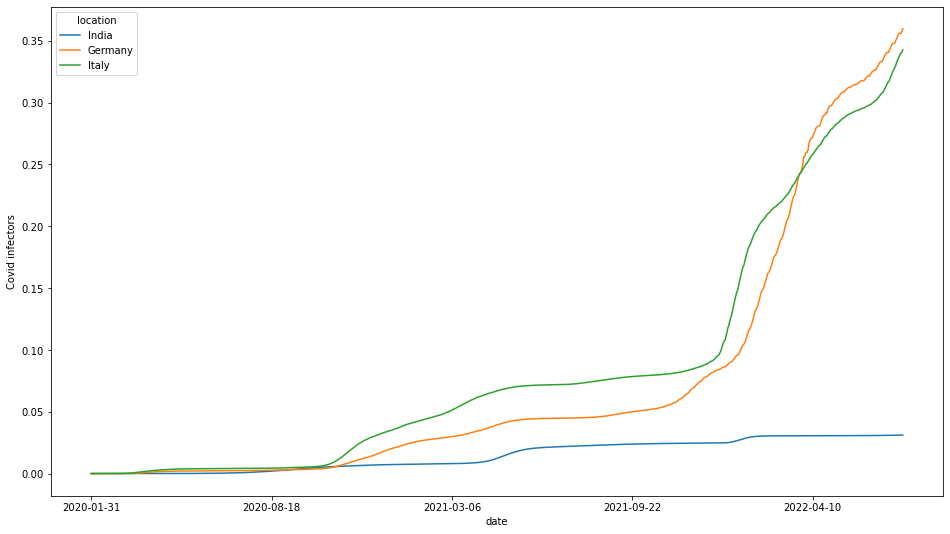

In [ ]:

df_final.plot()
plt.ylabel('Covid infectors')

Text(0, 0.5, 'Vaccination rate')

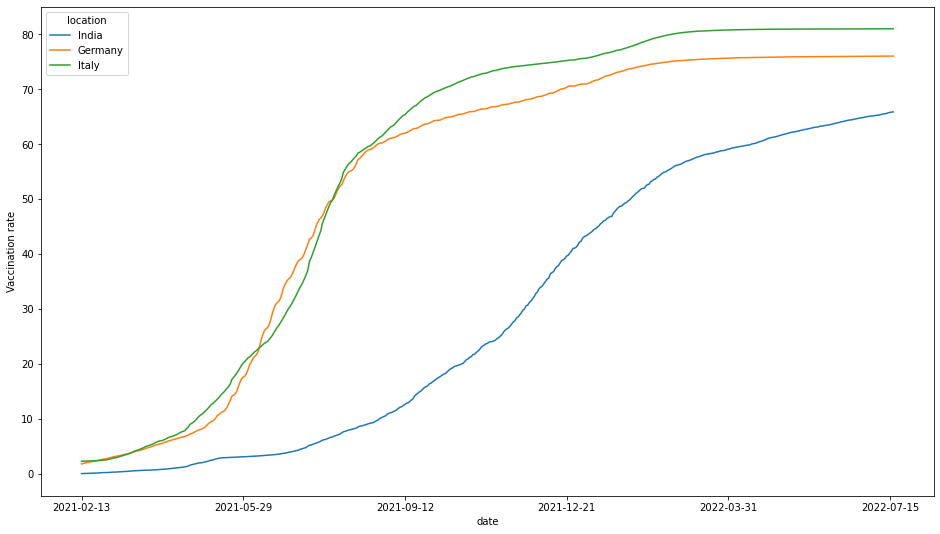

In [ ]:
df_vacc.plot()
plt.ylabel('Vaccination rate')